# Assignmen 6 vj222hx

## Conceptual
1. Bagging is a method for improving variance by training a model on multiple random subsets of a dataset and taking the average of those, or majority voiting for classification. Boosting however sequentially improves weak models with weighted errors where each new model tries to improve on missclassified points. Bagging generally has a lower risk than boosting as it averages the models instead of trying to improve them. For both methods there are multiple ways to build models using trees. For bagging you could use random forest which combines multiple decision trees and for Boosting you could use Gradient boosting which starts with a simple tree and adds more trees to correct the errors of the previous trees. 

2. Random forest makes multiple fully grown decision trees independently and averages (or votes) them. Here samples are equally weighted. This method is less prone to overfitting since it is averageing results. AdaBoost makes multiple shallow decission trees and sequentially improves them based on the errors of the previous trees. Here, missclassified samples get a higher weight. This is more prone to overfitting as it improves based on a full single training set. 

## Practical

Add imports

In [673]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Load Carseats dataset

In [674]:
csvFile = pd.read_csv("Carseats.csv", index_col=0)

Display the number of features and their names:

In [675]:
colNames = csvFile.columns.tolist()
print(f"Number of columns: {len(colNames)}")
print(f"Column Names: {colNames}")

Number of columns: 11
Column Names: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']


Print a statistic summary of the predictors and the response:

In [676]:
print(csvFile.describe(), "\n")
print(csvFile['ShelveLoc'].value_counts())
print(csvFile['Urban'].value_counts())
print(csvFile['US'].value_counts())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

Display the number of datapoints

In [677]:
print(f"Number of datapoints {len(csvFile)}")

Number of datapoints 400


Display the data in a table

In [678]:
print(csvFile.head(20))

    Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
1    9.50        138      73           11         276    120       Bad   42   
2   11.22        111      48           16         260     83      Good   65   
3   10.06        113      35           10         269     80    Medium   59   
4    7.40        117     100            4         466     97    Medium   55   
5    4.15        141      64            3         340    128       Bad   38   
6   10.81        124     113           13         501     72       Bad   78   
7    6.63        115     105            0          45    108    Medium   71   
8   11.85        136      81           15         425    120      Good   67   
9    6.54        132     110            0         108    124    Medium   76   
10   4.69        132     113            0         131    124    Medium   76   
11   9.01        121      78            9         150    100       Bad   26   
12  11.96        117      94            4         50

Correlation Plot

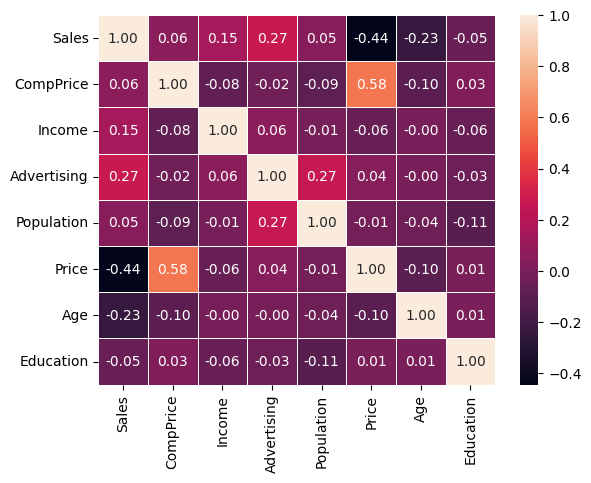

In [679]:
sns.heatmap(csvFile.drop(columns=['ShelveLoc', "Urban", "US"]).corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

Scatter plot of price to sales

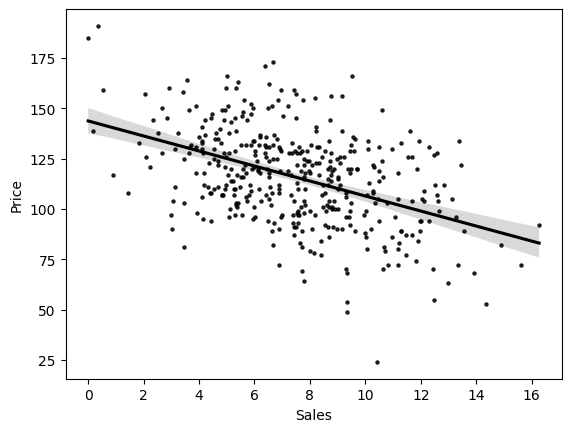

In [680]:
sns.regplot(x="Sales", y="Price", data=csvFile,  scatter_kws={'s': 5, 'color': 'black'}, line_kws={'color': 'black'})
plt.show()

Sales is our response and the most correlated predictor is price, and since it is a negative correlation, it means that if price goes down, the sales go up. The second most correlated predictor is Advertising which has a positive correlation. The least correlated predictors are Population and Education. The slope of the above regression plot also shows the -44 correlation between Price and Sales. 

In [681]:
csvFileEncoded = pd.get_dummies(csvFile, columns=["ShelveLoc", "Urban", "US"])
csvFile["High"] = ["No" if sales <= 8 else "Yes" for sales in csvFile["Sales"]]

X = csvFileEncoded.drop(columns=["Sales"]) 
y = csvFile["High"]

tree = DecisionTreeClassifier()
tree.fit(X, y)

print(f"Number of terminal nodes: {tree.get_n_leaves()}")

Number of terminal nodes: 61


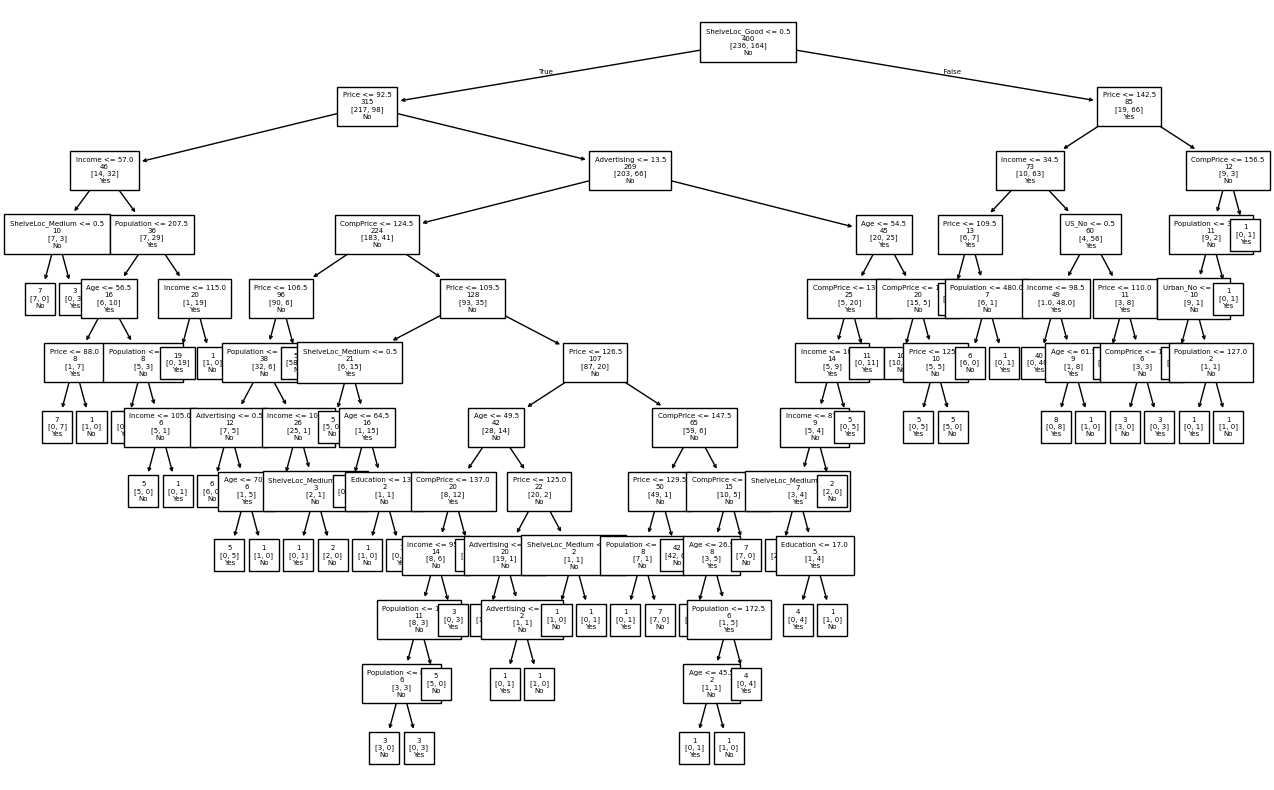

In [682]:
plt.figure(figsize=(16, 10))
plot_tree(tree, feature_names=X.columns, class_names=["No", "Yes"], impurity=False, fontsize=5, label="none")
plt.show()

The tree can be interpreted as when a point reaches the first node it checks if the ShelveLoc is good, and in that case it goes left, else it goes right. If it goes left it will check if the price is <= 92.5 and go left else right. Then it will do this all the way to the bottom where it will get an answer if "High" is Yes or No. 

In [683]:
csvFile_encoded = pd.get_dummies(csvFile, columns=["ShelveLoc", "Urban", "US"], drop_first=True)
X = csvFile_encoded.drop(columns=["Sales", "High"])
y = csvFile["High"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[94 25]
 [30 51]]


From here we can see that it had 95 true negatives, 25 false positives, 30 false negativesm and 51 true positives. This gives us a precision of 0.67 and a recall of 0.63. It also gives us an accuracy of 72.5%

In [684]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccpAlphas = path.ccp_alphas

cv_scores = []
best_accuracy = 0
best_alpha = 0
for alpha in ccpAlphas:
    pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    scores = cross_val_score(pruned_tree, X_train, y_train, cv=5)
    accuracy = scores.mean()
    cv_scores.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

print(f"Best accuracy {best_accuracy:.4f}, with alpha: {best_alpha:.4f}")

Best accuracy 0.7100, with alpha: 0.0128


In this case pruning the tree gave us a slightly worse score, 71% instead of the previous 72.5%

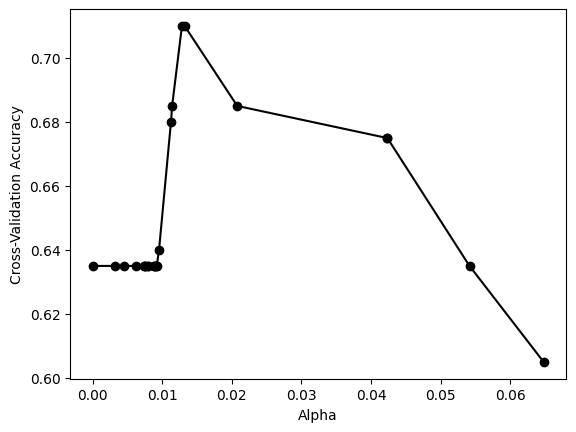

In [685]:
plt.plot(ccpAlphas, cv_scores, marker='o', color='black')

plt.xlabel("Alpha")
plt.ylabel("Cross-Validation Accuracy")
plt.show()

This shows our results from the previous test in graph form where we can see that an alpha of 0.0128 gives us a score of 71%

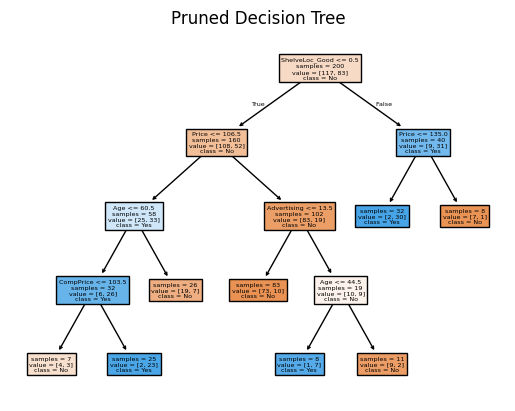

In [686]:
pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, class_names=["No", "Yes"], impurity=False)
plt.title("Pruned Decision Tree")
plt.show()

In [687]:
y_pred = pruned_tree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[100  19]
 [ 36  45]]


This gives us an accuracy of 72.5% when using the test data which is the same as without the pruning but with a more interperatable tree. 

Confusion Matrix:
[[98 21]
 [33 48]]


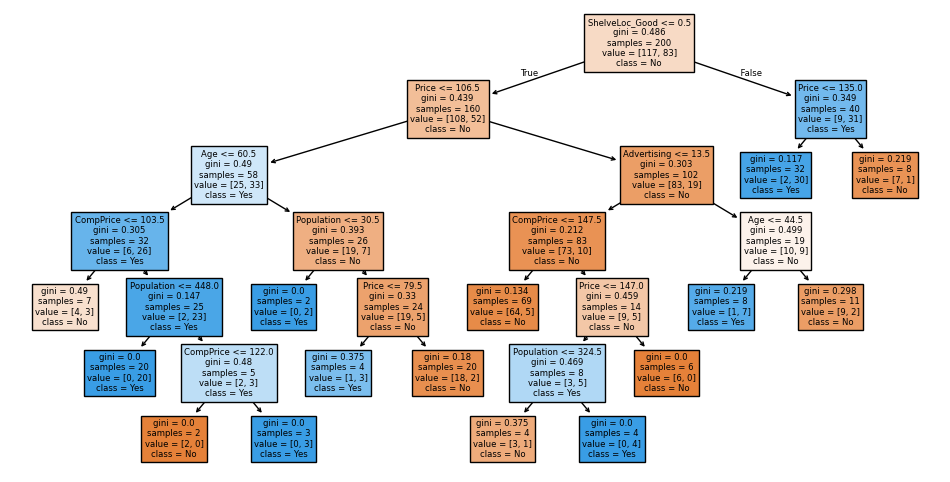

In [688]:
best_alpha = 0
for alpha in ccpAlphas:
    pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    if pruned_tree.get_n_leaves() <= 18:
        best_alpha = alpha
        break

pruned_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

y_pred = pruned_tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(12, 6))
plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, class_names=["No", "Yes"])
plt.show()

Now we are getting a slightly better score of 73%

Load Boston dataset

In [689]:
csvFile = pd.read_csv("Boston.csv", index_col=0)

Regression tree

In [690]:
X = csvFile.drop(columns=["medv"])
y = csvFile["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
tree = DecisionTreeRegressor(random_state=1, max_leaf_nodes=7)
tree.fit(X_train, y_train)

print(f"Number of leaves: {tree.get_n_leaves()}")
print(f"Depth of tree: {tree.get_depth()}")
print(f"Residual mean deviance: {tree.tree_.impurity.mean():.4f}")

Number of leaves: 7
Depth of tree: 4
Residual mean deviance: 26.0916


Plot the tree

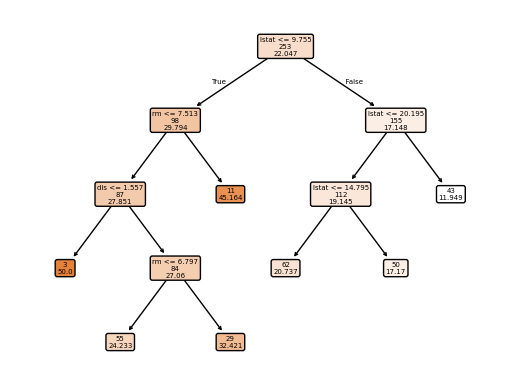

In [691]:
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, impurity=False, fontsize=5, label="none")
plt.show()

The residual mean deviance is 26.09 which is a way of measuring deviance

Best error 17.9246, with alpha: 1.3920


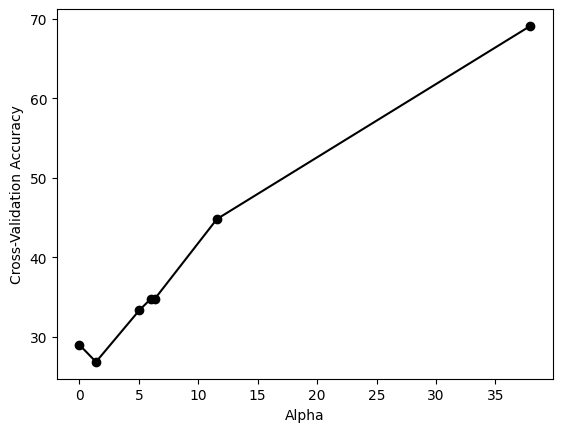

In [692]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccpAlphas = path.ccp_alphas

cv_scores = []
best_accuracy = 1000000
best_alpha = 0
for alpha in ccpAlphas:
    pruned_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    scores = -cross_val_score(pruned_tree, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    accuracy = scores.mean()
    cv_scores.append(accuracy)
    if accuracy < best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

pruned_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)
y_pred = pruned_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best error {mse:.4f}, with alpha: {best_alpha:.4f}")
plt.plot(ccpAlphas, cv_scores, marker='o', color='black')

plt.xlabel("Alpha")
plt.ylabel("Cross-Validation Accuracy")
plt.show()

We now got an error of 17.92 which is an improvement from without pruning

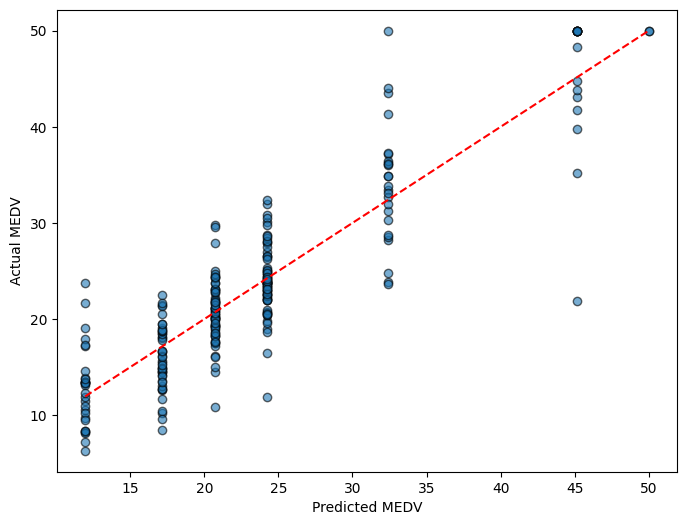

Mean Squared Error: 17.9246


In [ ]:
yhat = tree.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(yhat, y_test, alpha=0.6, edgecolors="k")
plt.plot([min(yhat), max(yhat)], [min(yhat), max(yhat)], color="red", linestyle="--")
plt.xlabel("Predicted MEDV")
plt.ylabel("Actual MEDV")
plt.show()

mse = np.mean((yhat - y_test) ** 2)
print(f"Mean Squared Error: {mse:.4f}")

Here we can see that the model follows the actual values pretty well with a mean squared error or 17.9 which is about the same as before

Learn and assess Regression Bagging (Trees) and Random Forests

MSE: 11.7347
R²: 86.63%


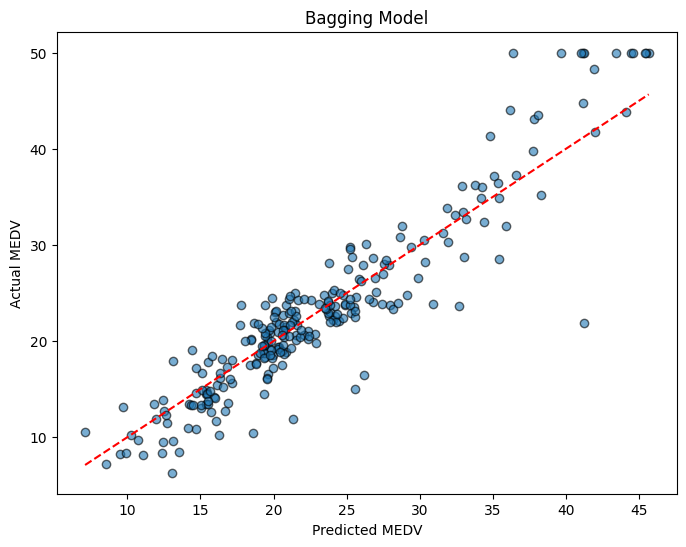

In [694]:
rf = RandomForestRegressor(n_estimators=500, max_features=13, random_state=1)
rf.fit(X_train, y_train)

yhat_bag = rf.predict(X_test)
mse_bag = mean_squared_error(y_test, yhat_bag)
r2_bag = r2_score(y_test, yhat_bag)
print(f"MSE: {mse_bag:.4f}")
print(f"R²: {100 * r2_bag:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(yhat_bag, y_test, alpha=0.6, edgecolors="k")
plt.plot([min(yhat_bag), max(yhat_bag)], [min(yhat_bag), max(yhat_bag)], color="red", linestyle="--")
plt.xlabel("Predicted MEDV")
plt.ylabel("Actual MEDV")
plt.title("Bagging Model")
plt.show()

This model has an MSE of 11.73 which is better than the previous 17.92

In [695]:
rf = RandomForestRegressor(n_estimators=25, max_features=13, random_state=1)
rf.fit(X_train, y_train)

yhat_bag = rf.predict(X_test)
mse_bag = mean_squared_error(y_test, yhat_bag)
r2_bag = r2_score(y_test, yhat_bag)
print(f"MSE: {mse_bag:.4f}")
print(f"R²: {100 * r2_bag:.2f}%")

MSE: 13.2764
R²: 84.87%


Now we are getting a worse MSE of 13.27 instead because we have fewer parameters the model can use for tuning

MSE: 11.7343
R²: 86.63%


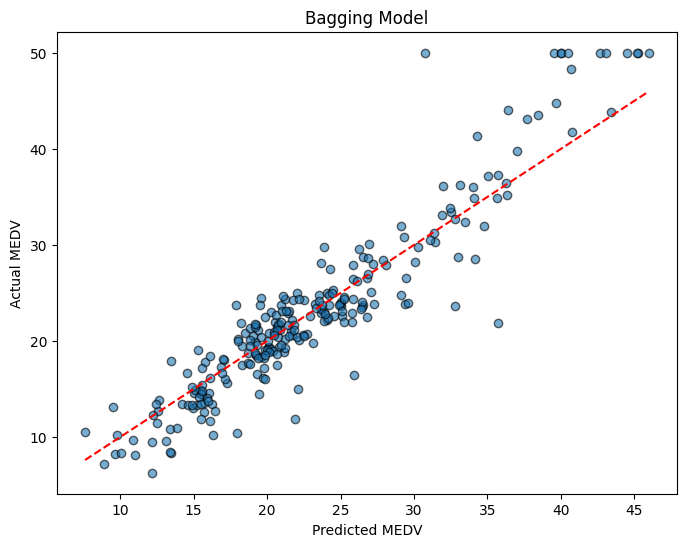

In [696]:
rf = RandomForestRegressor(n_estimators=500, max_features=6, random_state=1)
rf.fit(X_train, y_train)

yhat_bag = rf.predict(X_test)
mse_bag = mean_squared_error(y_test, yhat_bag)
r2_bag = r2_score(y_test, yhat_bag)
print(f"MSE: {mse_bag:.4f}")
print(f"R²: {100 * r2_bag:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(yhat_bag, y_test, alpha=0.6, edgecolors="k")
plt.plot([min(yhat_bag), max(yhat_bag)], [min(yhat_bag), max(yhat_bag)], color="red", linestyle="--")
plt.xlabel("Predicted MEDV")
plt.ylabel("Actual MEDV")
plt.title("Bagging Model")
plt.show()

This was almost the same result as we got before

Feature Importances:
lstat: 0.3789
rm: 0.2739
dis: 0.0660
indus: 0.0601
crim: 0.0576
nox: 0.0571
ptratio: 0.0302
age: 0.0277
tax: 0.0182
black: 0.0180
rad: 0.0059
zn: 0.0047
chas: 0.0016


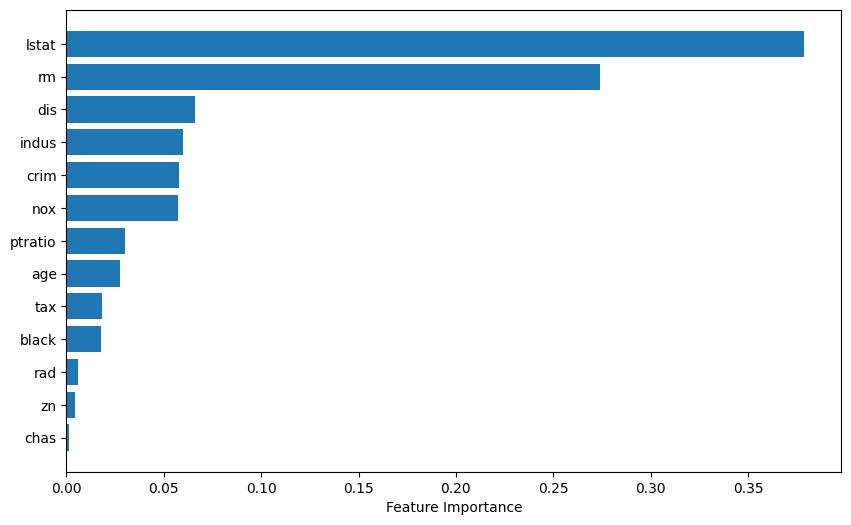

In [697]:
feature_importances = rf.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = X_train.columns

print("Feature Importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices])
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

Here we can see that lstat is the most important variable and chas is the least important in this random forest based model

lstat: 0.5136
rm: 0.2772
dis: 0.0851
crim: 0.0398
ptratio: 0.0266
tax: 0.0164
nox: 0.0159
black: 0.0117
age: 0.0063
indus: 0.0048
rad: 0.0018
chas: 0.0007
zn: 0.0000


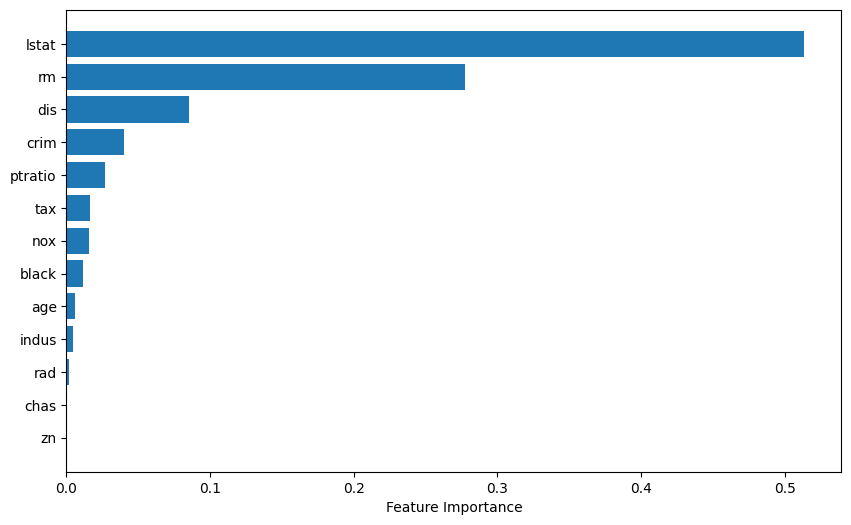

In [698]:
boost = GradientBoostingRegressor(loss="squared_error", n_estimators=5000, learning_rate=0.001, random_state=1)
boost.fit(X_train, y_train)
feature_importances = boost.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = X.columns

for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices])
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

Same thing here that lstat is the most influential parameter, but this time however, zn is the least influential parameter

In [699]:
yhat = boost.predict(X_test) 
mse_boost = mean_squared_error(y_test, yhat)
print(f"MSE: {mse_boost:.4f}")

MSE: 11.0007


Here we are getting a slightly better MSE however it is quite small so we probably need a significance test to see wether it is significantly better

lstat: 0.5015
rm: 0.2780
dis: 0.0971
crim: 0.0363
ptratio: 0.0259
black: 0.0159
nox: 0.0143
tax: 0.0117
age: 0.0099
indus: 0.0059
rad: 0.0027
zn: 0.0006
chas: 0.0004


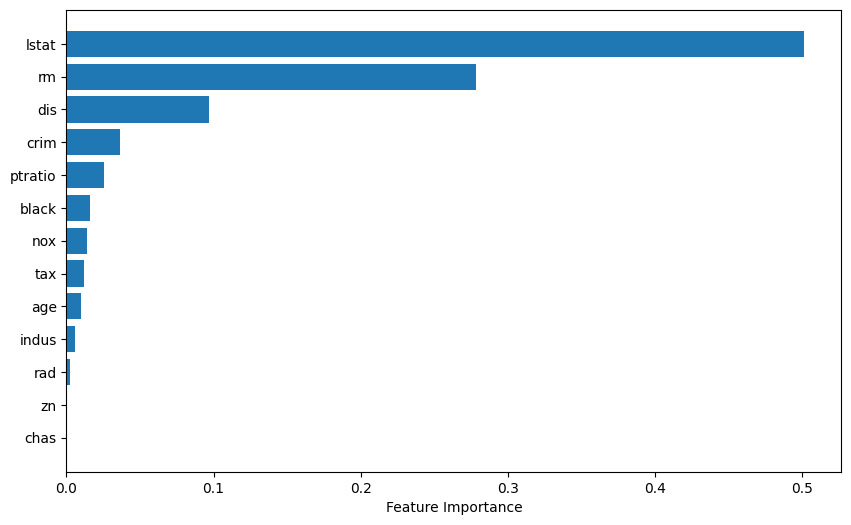


MSE: 11.0775


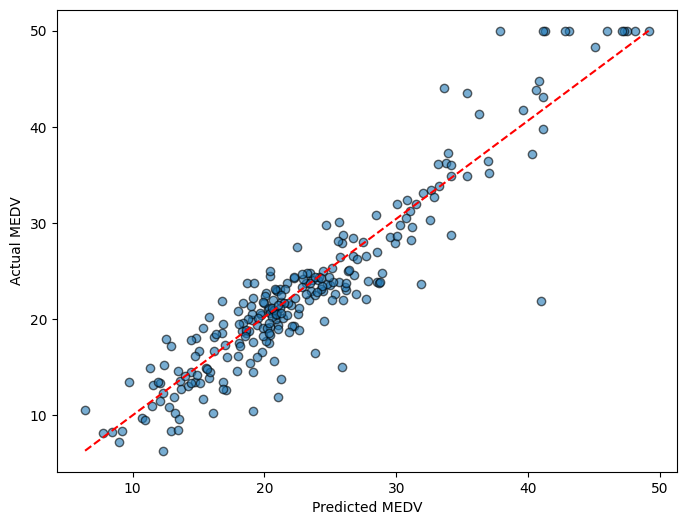

In [ ]:
boost = GradientBoostingRegressor(loss="squared_error", n_estimators=5000, learning_rate=0.2, random_state=1)
boost.fit(X_train, y_train)
feature_importances = boost.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
feature_names = X.columns

for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices])
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()

yhat = boost.predict(X_test) 
mse_boost = mean_squared_error(y_test, yhat)
print(f"\nMSE: {mse_boost:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(yhat, y_test, alpha=0.6, edgecolors="k")
plt.plot([min(yhat), max(yhat)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Predicted MEDV")
plt.ylabel("Actual MEDV")
plt.show()

Changing learning_rate to 0.2 gave us a slightly worse score. There is also a scatter plot of the prediction vs the actual values.